In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# Reading the dataset

In [2]:
train=pd.read_csv("../input/autism-prediction/Autism-prediction/train.csv")
test=pd.read_csv("../input/autism-prediction/Autism-prediction/test.csv")


train.head()


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [3]:
test.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,0,0,0,0,0,0,0,1,0,...,13.445319,m,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?
1,2,1,0,0,0,1,0,0,0,0,...,25.057229,f,?,yes,no,New Zealand,no,4.553447,18 and more,Parent
2,3,1,0,0,1,0,1,0,1,0,...,28.799885,f,Asian,no,no,Austria,no,-1.581115,18 and more,Self
3,4,1,1,1,0,1,0,1,0,1,...,16.501526,f,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative
4,5,1,0,0,1,1,0,0,1,1,...,54.223869,f,White-European,no,no,Australia,no,10.717321,18 and more,Self


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [5]:
train.describe() #statistical summary of the dataset

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.612306,7.058530,0.231250
std,231.0844,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.872373,3.788969,0.421896
min,1.0000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.560505,-2.594654,0.000000
25%,200.7500,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.282082,4.527556,0.000000
50%,400.5000,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.479960,6.893472,0.000000
75%,600.2500,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.154755,9.892981,0.000000
max,800.0000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.402488,13.390868,1.000000


**Check and remove all DUPLICATE RECORDS from the DATAFRAME**

In [6]:
train.drop_duplicates(inplace=True)
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [7]:
test.drop_duplicates(inplace=True)
test.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,0,0,0,0,0,0,0,1,0,...,13.445319,m,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?
1,2,1,0,0,0,1,0,0,0,0,...,25.057229,f,?,yes,no,New Zealand,no,4.553447,18 and more,Parent
2,3,1,0,0,1,0,1,0,1,0,...,28.799885,f,Asian,no,no,Austria,no,-1.581115,18 and more,Self
3,4,1,1,1,0,1,0,1,0,1,...,16.501526,f,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative
4,5,1,0,0,1,1,0,0,1,1,...,54.223869,f,White-European,no,no,Australia,no,10.717321,18 and more,Self


In [8]:
train.shape

(800, 22)

In [9]:
test.shape

(200, 21)

In [10]:
#Reset the index
#1. Creating new index array
indexColArray = np.array(list(range(0, len(train))))

#2. Assign the above array to my df
train.set_index(indexColArray, inplace=True)


In [11]:
indexColArray = np.array(list(range(0, len(test))))
test.set_index(indexColArray, inplace=True)

#  Checking null values

In [12]:

pd.DataFrame(train.isna().sum(), columns=["Missing Values"]).style.bar(color = "#84A9AC")


,Missing Values
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [13]:

pd.DataFrame(test.isna().sum(), columns=["Missing Values"]).style.bar(color = "#84A9AC")

,Missing Values
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


# Handling categorical features

In [14]:
 #Check and remove all DUPLICATE COLUMNS from the DATAFRAME

train.drop( ['age_desc','contry_of_res'] , axis = 1, inplace=True)


In [15]:
# handling the spelling issue 
train = train.rename(columns = {'austim': 'autism'}, errors="raise")



In [16]:
train.gender.unique()

array(['f', 'm'], dtype=object)

In [17]:
train.ethnicity.unique()

array(['White-European', 'South Asian', 'Black', 'Asian',
       'Middle Eastern ', '?', 'others', 'Latino', 'Turkish', 'Others',
       'Hispanic', 'Pasifika'], dtype=object)

In [18]:
train.jaundice.unique()

array(['no', 'yes'], dtype=object)

In [19]:
train.autism.unique()

array(['no', 'yes'], dtype=object)

In [20]:
train.used_app_before.unique()

array(['no', 'yes'], dtype=object)

In [21]:
train.relation.unique()

array(['Self', '?', 'Health care professional', 'Parent', 'Relative',
       'Others'], dtype=object)

# Handling Invalid values 

**In ethnicity feature, Replacing others with Others**

In [22]:
train['ethnicity'] = train['ethnicity'].replace('?', 'Others')

In [23]:
train['ethnicity'] = train['ethnicity'].replace('others', 'Others')

In [24]:
train['relation'] = train['relation'].replace('?', train['relation'].mode()[0])

In [25]:
train['relation'].unique()

array(['Self', 'Health care professional', 'Parent', 'Relative', 'Others'],
      dtype=object)

In [26]:
test['ethnicity'] = test['ethnicity'].replace('?', 'Others')

In [27]:
test['ethnicity'] = test['ethnicity'].replace('others', 'Others')

In [28]:
test['relation'] = test['relation'].replace('?', test['relation'].mode()[0])

In [29]:
test['relation'].unique()

array(['Self', 'Parent', 'Relative', 'Health care professional', 'Others'],
      dtype=object)

# Visualization

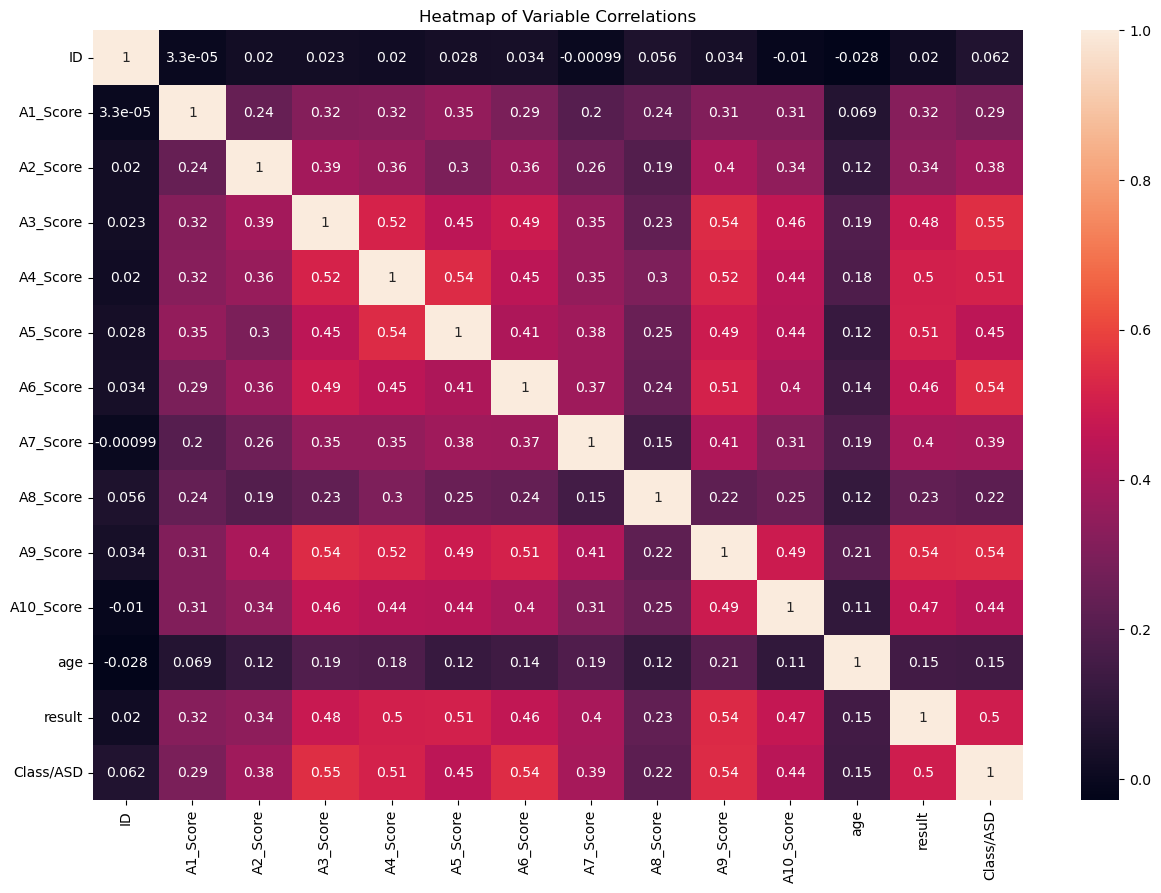

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

**count of different values present in gender**

In [31]:
train['gender'].value_counts()  

f    415
m    385
Name: gender, dtype: int64

# Balancing imbalanced data using oversampling

In [32]:
#checking for balance data
train.value_counts('Class/ASD')

Class/ASD
0    615
1    185
dtype: int64

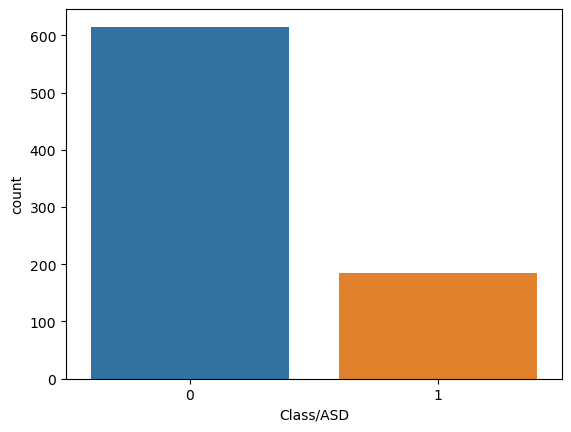

In [33]:
sns.countplot(x="Class/ASD", data=train)
plt.show()

In [34]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = train[train["Class/ASD"]==0]
df_2 = train[train["Class/ASD"]==1]
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=615,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
train_upsampled = pd.concat([df_1, df_2_upsampled])
 
# Display new class counts
train_upsampled["Class/ASD"].value_counts()


0    615
1    615
Name: Class/ASD, dtype: int64

In [35]:
train_upsampled.head(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,used_app_before,result,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18.605397,f,White-European,no,no,no,7.819715,Self,0
1,2,0,0,0,0,0,0,0,0,0,1,13.829369,f,South Asian,no,no,no,10.544296,Self,0
3,4,0,0,0,1,0,0,0,0,0,0,61.035288,f,South Asian,no,no,no,1.530098,Self,0
4,5,0,0,0,0,1,0,0,0,1,1,14.256686,m,Black,no,yes,no,7.949723,Self,0
5,6,1,0,0,0,0,0,0,1,0,0,15.578191,m,Asian,no,no,no,7.445003,Self,0


# After Oversampling

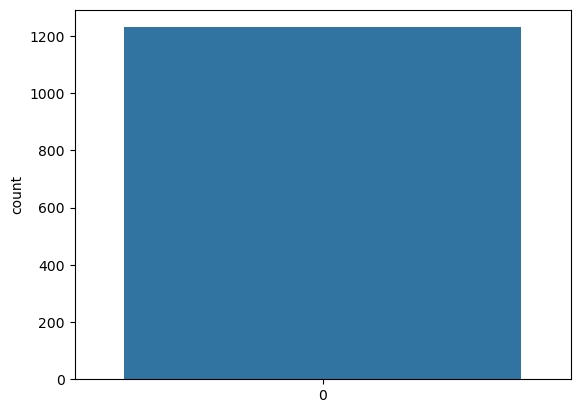

In [36]:
sns.countplot(train_upsampled["Class/ASD"])
sns.set(rc={'figure.figsize':(10,10)})

# level Encoding

In [37]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [38]:

#gender
print(train_upsampled['gender'].unique())
train_upsampled['gender']= label_encoder.fit_transform(train_upsampled['gender'])
print(train_upsampled['gender'].unique())


#ethnicity
print(train_upsampled['ethnicity'].unique())
train_upsampled['ethnicity']= label_encoder.fit_transform(train_upsampled['ethnicity'])
print(train_upsampled['ethnicity'].unique())


#jaundice
print(train_upsampled['jaundice'].unique())
train_upsampled['jaundice']= label_encoder.fit_transform(train_upsampled['jaundice'])
print(train_upsampled['jaundice'].unique())

#autism
print(train_upsampled['autism'].unique())
train_upsampled['autism']= label_encoder.fit_transform(train_upsampled['autism'])
print(train_upsampled['autism'].unique())

#used_app_before
print(train_upsampled['used_app_before'].unique())
train_upsampled['used_app_before']= label_encoder.fit_transform(train_upsampled['used_app_before'])
print(train_upsampled['used_app_before'].unique())


#relation
print(train_upsampled['relation'].unique())
train_upsampled['relation']= label_encoder.fit_transform(train_upsampled['relation'])
print(train_upsampled['relation'].unique())

['f' 'm']
[0 1]
['White-European' 'South Asian' 'Black' 'Asian' 'Middle Eastern ' 'Others'
 'Latino' 'Turkish' 'Hispanic' 'Pasifika']
[9 7 1 0 4 5 3 8 2 6]
['no' 'yes']
[0 1]
['no' 'yes']
[0 1]
['no' 'yes']
[0 1]
['Self' 'Health care professional' 'Parent' 'Others' 'Relative']
[4 0 2 1 3]


In [39]:
train_upsampled.head(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,used_app_before,result,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18.605397,0,9,0,0,0,7.819715,4,0
1,2,0,0,0,0,0,0,0,0,0,1,13.829369,0,7,0,0,0,10.544296,4,0
3,4,0,0,0,1,0,0,0,0,0,0,61.035288,0,7,0,0,0,1.530098,4,0
4,5,0,0,0,0,1,0,0,0,1,1,14.256686,1,1,0,1,0,7.949723,4,0
5,6,1,0,0,0,0,0,0,1,0,0,15.578191,1,0,0,0,0,7.445003,4,0


# Data Splitting

In [40]:
X = train_upsampled.drop(['Class/ASD','ID'],axis=1)
Y = train_upsampled['Class/ASD']

test = test.drop(['ID'],axis=1)

from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.2,random_state=42)


# Model Building & Evaluation

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import LabelBinarizer



def evaluator(Y_test, Y_pred):    
    
    # Accuracy:
    print('Accuracy is: ', accuracy_score(Y_test,Y_pred))
    print('')
    # Classification Report:
    print('Classification Report: \n',classification_report(Y_test,Y_pred))

     # Area Under The Curve Score:

    lb = LabelBinarizer()
    Y_test1 = lb.fit_transform(Y_test)
    Y_pred1 =lb.transform(Y_pred)
    print('AUC_ROC Score: ',roc_auc_score(Y_test1,Y_pred1,average='macro'),'\n\n')
   

    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='g');
    plt.title('Confusion Matrix', fontsize=20)

    

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.001, 0.01,0.1,1,10] }
clf = GridSearchCV(LogisticRegression(penalty='l2',max_iter = 250), cv = 5, param_grid = param_grid)

In [43]:
clf.fit(X_train, Y_train)
print(clf.best_score_)
print(clf.best_estimator_)

0.8539591836734693
LogisticRegression(C=1, max_iter=250)


In [44]:
clf_best = clf.best_estimator_

In [45]:
clf_best.fit(X,Y)


LogisticRegression(C=1, max_iter=250)

#### Logistic Regression

Accuracy is:  0.866869918699187

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       505
           1       0.86      0.86      0.86       479

    accuracy                           0.87       984
   macro avg       0.87      0.87      0.87       984
weighted avg       0.87      0.87      0.87       984

AUC_ROC Score:  0.8667500361727196 


Confusion Matrix: 


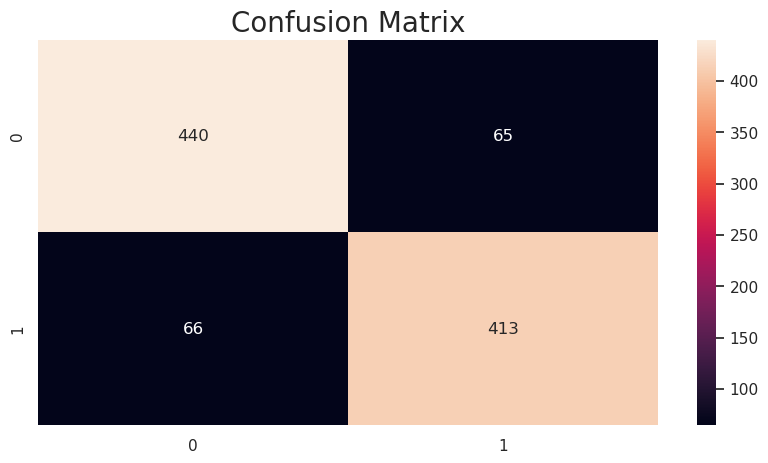

In [46]:
pred_lg = clf_best.predict(X_test)
evaluator(Y_test, pred_lg)

# RandomForest 

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train,Y_train)

RandomForestClassifier()

Accuracy is:  0.8760162601626016

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       505
           1       0.86      0.90      0.88       479

    accuracy                           0.88       984
   macro avg       0.88      0.88      0.88       984
weighted avg       0.88      0.88      0.88       984

AUC_ROC Score:  0.8765208044812832 


Confusion Matrix: 


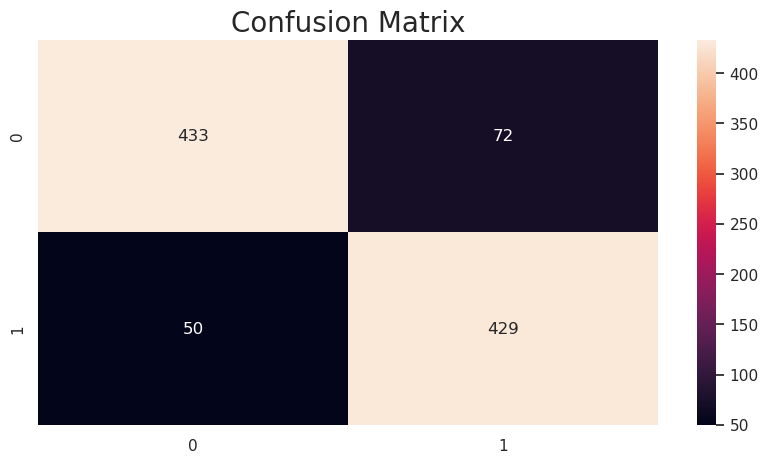

In [48]:
pred_rf = rf_classifier.predict(X_test)

evaluator(Y_test, pred_rf)

# Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train,Y_train)

GradientBoostingClassifier()

Accuracy is:  0.8434959349593496

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.78      0.84       505
           1       0.80      0.91      0.85       479

    accuracy                           0.84       984
   macro avg       0.85      0.85      0.84       984
weighted avg       0.85      0.84      0.84       984

AUC_ROC Score:  0.8451063477955311 


Confusion Matrix: 


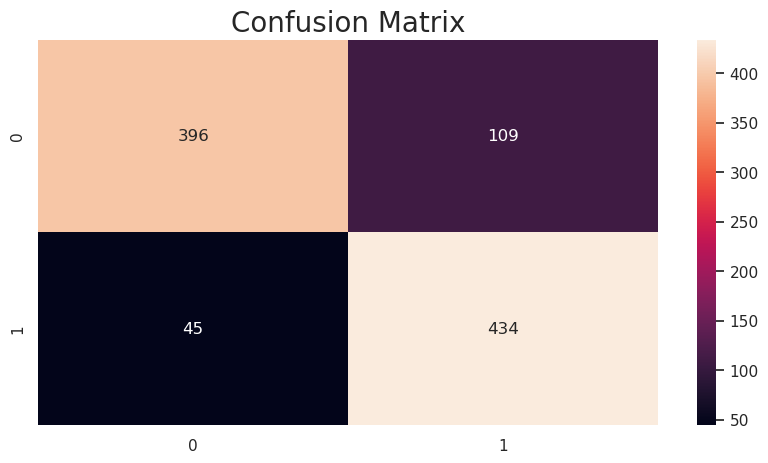

In [50]:
# Predict
pred_gb = gb_classifier.predict(X_test)
evaluator(Y_test, pred_gb)

In [51]:
xgb_params=  {
              'objective': 'binary:logistic',
              'eval_metric': 'auc',
              'boosting_type' :	 'gbdt',
              'lambda_l1' :	 1.4679791331431786,
              'lambda_l2' :	 0.008403131421304244,
              'colsample_bytree' :	 1.0,
              'bagging_fraction' :	 0.6,
              'feature_fraction' :	 0.6,
              'learning_rate' :	 0.0015584305322779072,
              'max_depth' :	 7,
              'num_leaves' :88,
              'alpha': 0.5108154566815425,
              'gamma': 1.9276236172849432,
              'reg_lambda': 11.40999855634382,
              'subsample': 0.8386116751473301,
              'min_child_weight': 2.5517043283716605,
              'min_child_samples':	 56
}

xgb =  xgb.XGBClassifier(**xgb_params,n_estimators=10000,random_state=1)
xgb.fit(X_train,Y_train)

[09:31:26] WARNING: ../src/learner.cc:767: 
Parameters: { "bagging_fraction", "boosting_type", "feature_fraction", "lambda_l1", "lambda_l2", "min_child_samples", "num_leaves" } are not used.



XGBClassifier(alpha=0.5108154566815425, bagging_fraction=0.6, base_score=None,
              booster=None, boosting_type='gbdt', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_fraction=0.6,
              feature_types=None, gamma=1.9276236172849432, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda_l1=1.4679791331431786,
              lambda_l2=0.008403131421304244,
              learning_rate=0.0015584305322779073, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_samples=56, min_child_weight=2.5517043283716605, ...)

Accuracy is:  0.8333333333333334

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       505
           1       0.82      0.85      0.83       479

    accuracy                           0.83       984
   macro avg       0.83      0.83      0.83       984
weighted avg       0.83      0.83      0.83       984

AUC_ROC Score:  0.8337005725624754 


Confusion Matrix: 


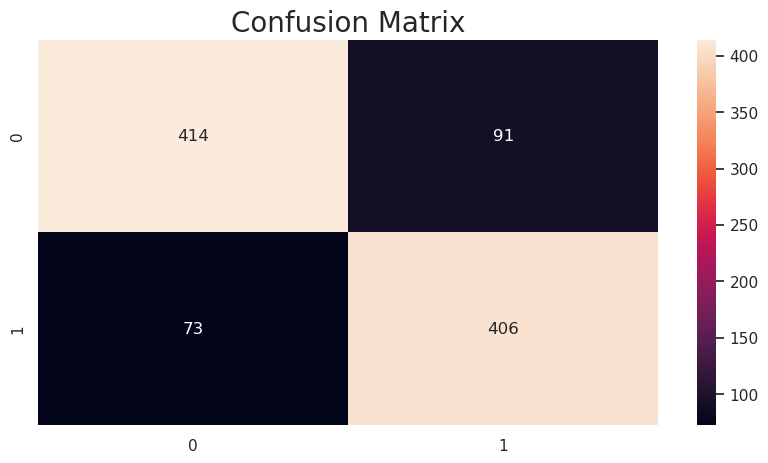

In [52]:
# Predict
pred_xgb = xgb.predict(X_test)
evaluator(Y_test, pred_xgb)

In [53]:
test=pd.read_csv("../input/autism-prediction/Autism-prediction/test.csv")
test.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,0,0,0,0,0,0,0,1,0,...,13.445319,m,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?
1,2,1,0,0,0,1,0,0,0,0,...,25.057229,f,?,yes,no,New Zealand,no,4.553447,18 and more,Parent
2,3,1,0,0,1,0,1,0,1,0,...,28.799885,f,Asian,no,no,Austria,no,-1.581115,18 and more,Self
3,4,1,1,1,0,1,0,1,0,1,...,16.501526,f,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative
4,5,1,0,0,1,1,0,0,1,1,...,54.223869,f,White-European,no,no,Australia,no,10.717321,18 and more,Self


In [54]:
test = test.rename(columns = {'austim': 'autism'}, errors="raise")

test.drop( ['age_desc','contry_of_res'] , axis = 1, inplace=True)

In [55]:
X_test = test.drop("ID", axis=1)
X_test.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,used_app_before,result,relation
0,0,0,0,0,0,0,0,1,0,0,13.445319,m,Asian,no,no,no,-0.914467,?
1,1,0,0,0,1,0,0,0,0,0,25.057229,f,?,yes,no,no,4.553447,Parent
2,1,0,0,1,0,1,0,1,0,0,28.799885,f,Asian,no,no,no,-1.581115,Self
3,1,1,1,0,1,0,1,0,1,1,16.501526,f,Middle Eastern,yes,no,no,11.779210,Relative
4,1,0,0,1,1,0,0,1,1,0,54.223869,f,White-European,no,no,no,10.717321,Self



# level encoding On Test Data

In [56]:

#gender
print(test['gender'].unique())
test['gender']= label_encoder.fit_transform(test['gender'])
print(test['gender'].unique())


#ethnicity
print(test['ethnicity'].unique())
test['ethnicity']= label_encoder.fit_transform(test['ethnicity'])
print(test['ethnicity'].unique())


#jaundice
print(test['jaundice'].unique())
test['jaundice']= label_encoder.fit_transform(test['jaundice'])
print(test['jaundice'].unique())

#autism
print(test['autism'].unique())
test['autism']= label_encoder.fit_transform(test['autism'])
print(test['autism'].unique())

#used_app_before
print(test['used_app_before'].unique())
test['used_app_before']= label_encoder.fit_transform(test['used_app_before'])
print(test['used_app_before'].unique())


#relation
print(test['relation'].unique())
test['relation']= label_encoder.fit_transform(test['relation'])
print(test['relation'].unique())

['m' 'f']
[1 0]
['Asian' '?' 'Middle Eastern ' 'White-European' 'Latino' 'Pasifika'
 'Black' 'Hispanic' 'South Asian' 'Others' 'Turkish' 'others']
[ 1  0  5 10  4  7  2  3  8  6  9 11]
['no' 'yes']
[0 1]
['no' 'yes']
[0 1]
['no' 'yes']
[0 1]
['?' 'Parent' 'Self' 'Relative' 'Health care professional' 'Others']
[0 3 5 4 1 2]


In [57]:
X_test = test.drop("ID", axis=1)
X_test.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,used_app_before,result,relation
0,0,0,0,0,0,0,0,1,0,0,13.445319,1,1,0,0,0,-0.914467,0
1,1,0,0,0,1,0,0,0,0,0,25.057229,0,0,1,0,0,4.553447,3
2,1,0,0,1,0,1,0,1,0,0,28.799885,0,1,0,0,0,-1.581115,5
3,1,1,1,0,1,0,1,0,1,1,16.501526,0,5,1,0,0,11.779210,4
4,1,0,0,1,1,0,0,1,1,0,54.223869,0,10,0,0,0,10.717321,5


In [58]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,Y_train)

pred_rf = rf_classifier.predict(X_test)

pred_rf=np.array(pred_rf)
pred_rf=pd.DataFrame(pred_rf)

In [59]:
test = pd.read_csv("../input/autism-prediction/Autism-prediction/test.csv")
test.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,0,0,0,0,0,0,0,1,0,...,13.445319,m,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?
1,2,1,0,0,0,1,0,0,0,0,...,25.057229,f,?,yes,no,New Zealand,no,4.553447,18 and more,Parent
2,3,1,0,0,1,0,1,0,1,0,...,28.799885,f,Asian,no,no,Austria,no,-1.581115,18 and more,Self
3,4,1,1,1,0,1,0,1,0,1,...,16.501526,f,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative
4,5,1,0,0,1,1,0,0,1,1,...,54.223869,f,White-European,no,no,Australia,no,10.717321,18 and more,Self


In [60]:
id1=np.array(test['ID'])
id1=pd.DataFrame(id1)
id1.shape

(200, 1)

In [61]:
output=pd.concat([id1,pred_rf], join='outer', axis=1)
output.columns = ['ID', 'Class/ASD']
output

,ID,Class/ASD
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0
...,...,...
195,196,0
196,197,1
197,198,1
198,199,1


In [62]:
output.to_csv("submission.csv",index=False)